In [43]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

### System Parameters-

In [44]:
G = 6.673e-11
R_s = 696340000 #parameter
M_s = 1.989e30 #parameter
a = 778000000000 #parameter
R_p = 69911000 #parameter

e = 0.7

P = 2*np.pi*np.sqrt(a**3/(G*M_s)) #Kepler's Third Law

### Orientation Parameters-

In [45]:
i = 0.9991*np.pi/2 #parameter- t_T and t_F exist only for i close to pi/2
Omega = np.pi/3
omega = np.pi/100

In [46]:
def nuoft(t): #true anomaly as a function of time
    T = 0
    M = 2*np.pi*(t-T)/P
   
    #Numerically solving M = E-e*sinE
    E_n1 = M
    E_n0 = 0
    
    while abs(E_n1-E_n0)>0.1:
        temp = M + e*np.sin(E_n1)
        E_n0 = E_n1
        E_n1 = temp
    
    E = E_n1
    
    nu = np.arccos((np.cos(E)-e)/(1-e*np.cos(E)))
    if E>np.pi: #Accounting for the limited range of arccos
        nu = 2*np.pi - nu
        
    return nu

In [47]:
def unitVector(nu):
    n_x = -np.cos(i)*np.cos(Omega)*np.sin(omega+nu)-np.sin(Omega)*np.cos(omega+nu)
    n_y = np.cos(Omega)*np.cos(omega+nu)-np.cos(i)*np.sin(Omega)*np.sin(omega+nu)
    n_z = np.sin(i)*np.sin(omega+nu)
    return np.array([n_x,n_y,n_z])


def getposition(nu):
  position = np.array([r*unitVector(nu)[0],r*unitVector(nu)[1],r*unitVector(nu)[2]])
  return position


In [48]:
t = np.linspace(0,P,250000)
nu = np.array([nuoft(time) for time in t])

r = a*(1-e**2)/(1+e*np.cos(nu))
position = getposition(nu)

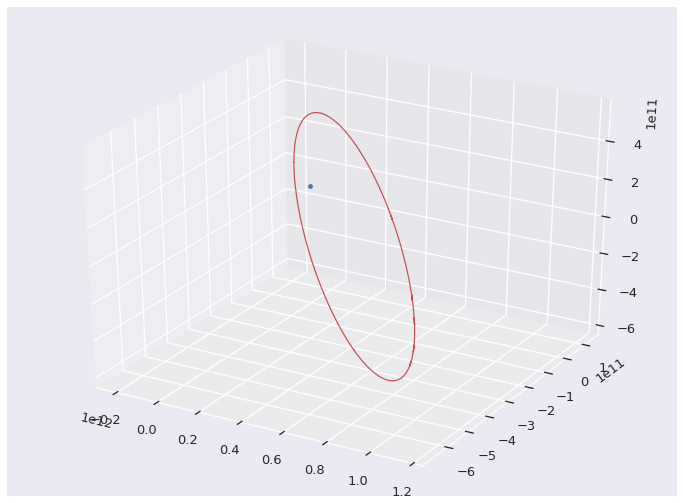

In [49]:
fig = plt.figure(figsize=(12,9))
ax = fig.gca(projection='3d')
ax._axis3don = True

ax.plot(*position, "-r", linewidth = 1.2)
ax.scatter(0,0,0)


plt.show()

## Projection:


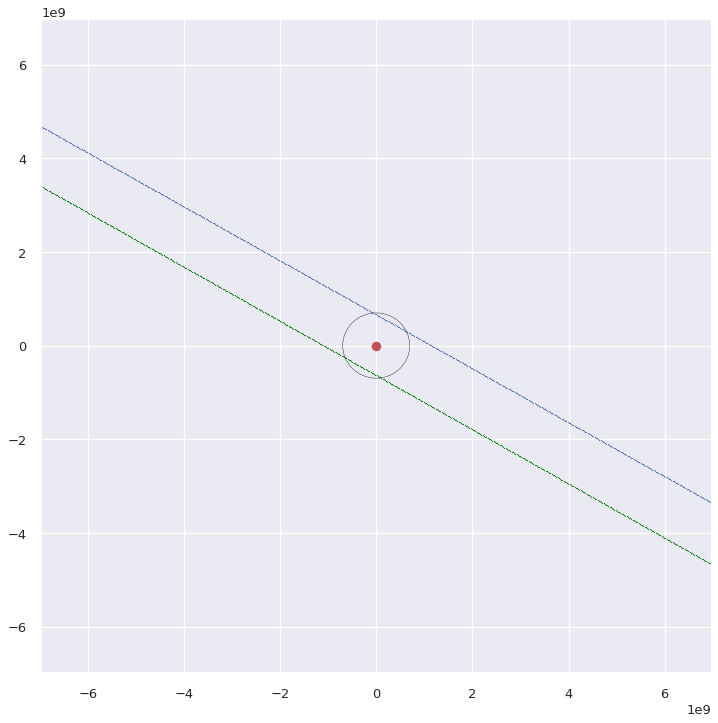

In [50]:
fig = plt.figure(figsize=(12,12))
plt.scatter(position[0][np.where(position[2]<0)],position[1][np.where(position[2]<0)],c='b',s=0.75)
plt.scatter(position[0][np.where(position[2]>0)],position[1][np.where(position[2]>0)],c='green',s=0.75)

ax = plt.gcf().gca()

star=plt.Circle([0,0],R_s,color='black',fill=False)
ax.add_artist(star)
plt.scatter(0,0,c='r')


plt.ylim(-10*R_s,10*R_s)
plt.xlim(-10*R_s,10*R_s)
plt.show()

## Intersectional Area:

In [51]:
def intersection_area(s, R, p, r):
    """Return the area of intersection of two circles."""
    d = np.linalg.norm(p-s)
    if d <= abs(R-r):
        # One circle is entirely enclosed in the other.
        return np.pi * min(R, r)**2
    if d >= r + R:
        # The circles don't overlap at all.
        return 0

    r2, R2, d2 = r**2, R**2, d**2
    alpha = np.arccos((d2 + r2 - R2) / (2*d*r))
    beta = np.arccos((d2 + R2 - r2) / (2*d*R))
    return ( r2 * alpha + R2 * beta -
             0.5 * (r2 * np.sin(2*alpha) + R2 * np.sin(2*beta)))

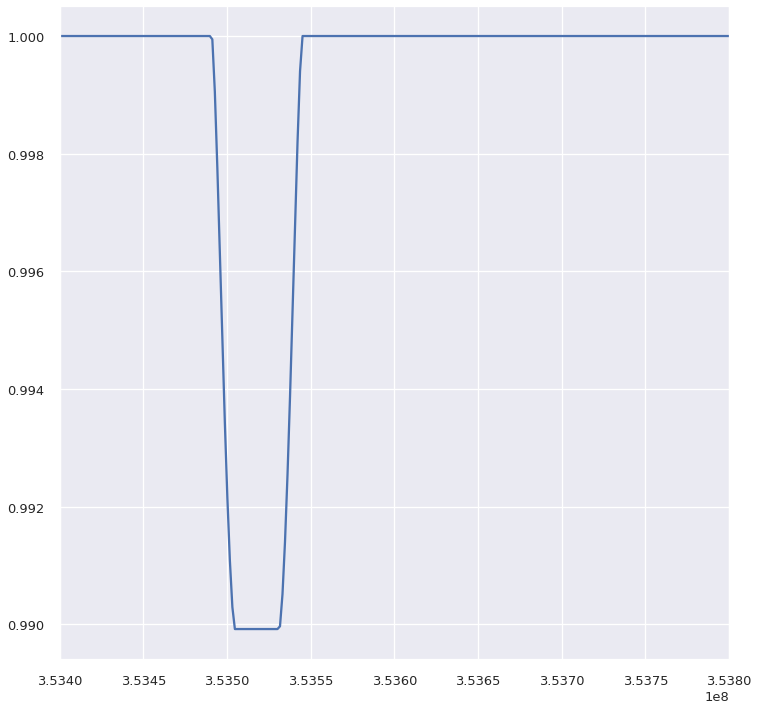

In [52]:
from matplotlib.pyplot import style
import seaborn as sns

sns.set()
style.use('seaborn-talk')

fig = plt.figure(figsize=(12,12))
coord_p = np.column_stack((position[0],position[1]))
coord_s = np.array([0,0])

area = np.array([intersection_area(coord_s,R_s,p,R_p) for p in coord_p])
flux = np.copy(area)
for i,x in enumerate(position[2]):
  if x>0:
    flux[i]=0

plt.plot(t,1-flux/(np.pi*R_s**2))
plt.xlim(3.534e8,3.538e8)
plt.show()